#Столбцы таблицы:

CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly
%matplotlib inline
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

churn_data_zero = pd.read_csv('data/churn.csv')
churn_data = churn_data_zero.copy()
churn_data = churn_data.drop('RowNumber', axis=1)
#churn_data.describe()
#churn_data.info()

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

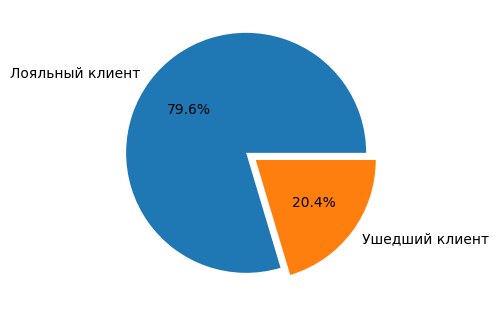

In [99]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
churn_data_active_member = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    churn_data_active_member,
    autopct='%.1f%%',
    labels= ['Лояльный клиент', 'Ушедший клиент'],
    explode = [0.1, 0]);
#print(churn_data_active_member)

Процент ушедших клиентов составляет 20.4%, это значит, что ушел каждый пятый клиент, это довольно серьезный уровень оттока. Рекомендуется определить состав аудитории, покинувшей банк (возраст, пол, местоположение, активность, платежеспособность и т.д.) и объем средств, ушедших вместе с клиентами, так как обычно стоимость приобретения новых клиентов в несколько раз выше стоимости обслуживания старых клиентов.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

медиана 119839.69
среднее 119827.49379288736
квантиль 0.75 -  139512.29
квантиль 0.25 -  100181.975
std -  30095.056462042667


0    105473.74
1    130170.82
Name: Balance, dtype: float64

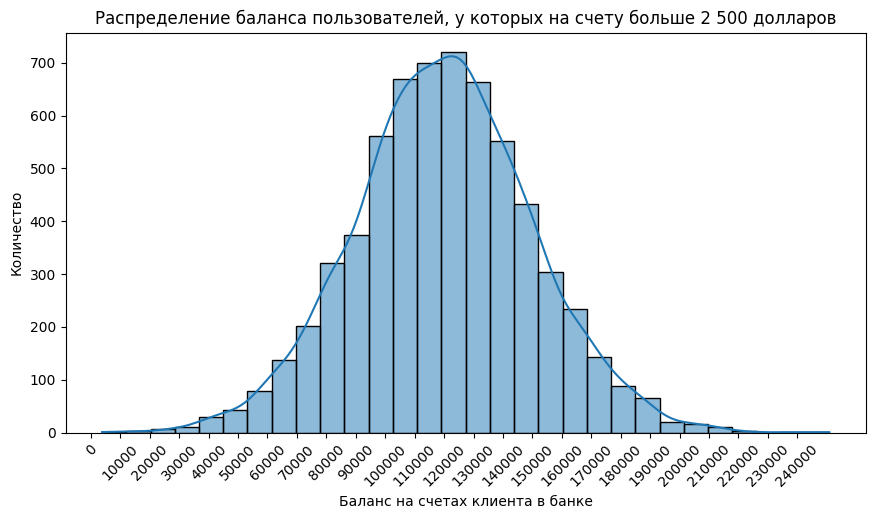

In [113]:
mask = churn_data['Balance'] > 2500
churn_data_balance = churn_data[mask]
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
listOf_Xticks = np.arange(0, 250000, 10000)
axes.set_xticks(listOf_Xticks);
axes.xaxis.set_tick_params(rotation=45)
axes.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов');
sns.histplot(
    data=churn_data_balance,
    x='Balance',
    bins=30,
    kde=True,
    
);
axes.set_xlabel('Баланс на счетах клиента в банке');
axes.set_ylabel('Количество');


print('медиана', churn_data_balance['Balance'].median())
print('среднее', churn_data_balance['Balance'].mean())
print('квантиль 0.75 - ', churn_data_balance['Balance'].quantile(0.75))
print('квантиль 0.25 - ',churn_data_balance['Balance'].quantile(0.25))
print('std - ',churn_data_balance['Balance'].std())
churn_data_balance['Balance'].mode()

Полученный график распределения показателя баланса имеет вид нормального  распределение со следующими характеристиками
медиана 119839.69, среднее 119827.49, квантиль 0.75 -  139512.29, квантиль 0.25 -  100181.975, среднеквадратичное отклонение -  30095.06
и подчиняется правилу двух и трех сигм, то есть 68% пользователей, у которых на счету больше 2 500 долларов, имеют баланс в диапазоне от 89 до 149 тысяч, 95% пользователей имеют баланс в диапазоне от 59 до 179 тысяч, 99%  - в диапазоне от 29 до 209 тысяч.

In [12]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Plot 1", "Plot 2"))
mask = churn_data['Balance'] > 2500
mask1 = (churn_data['Balance'] > 2500) & (churn_data['Exited']==1)
mask0 = (churn_data['Balance'] > 2500) & (churn_data['Exited']==0)

fig.add_trace(go.Histogram(x=churn_data[mask]['Balance']), 1, 1)
fig.add_trace(go.Box(x=churn_data[mask]['Balance']), 2, 1)

fig.add_trace(go.Histogram(x=churn_data[mask1]['Balance'], opacity=0.75, name='Ушедшие клиенты'), 1, 2)
fig.add_trace(go.Histogram(x=churn_data[mask0]['Balance'], opacity=0.45, name='Лояльные клиенты'), 1, 2)
fig.update_layout(barmode='overlay',)


fig.add_trace(go.Box(x=churn_data[mask1]['Balance'], name='Ушедшие клиенты'), 2, 2)
fig.add_trace(go.Box(x=churn_data[mask0]['Balance'], name='Лояльные клиенты'), 2, 2)
fig.update_layout(width = 1000, height  = 500)

fig.update_layout(title="Распределение баланса пользователей, у которых на счету больше 2 500 долларов")
fig.update_xaxes(title='Баланс', col=1, row=1)
fig.update_xaxes(title='Баланс', col=2, row=1)
fig.update_xaxes(title='Баланс', col=1, row=2)
fig.update_xaxes(title='Баланс', col=2, row=2)
fig.update_yaxes(title='Количество', col=1, row=1)
fig.update_yaxes(title='Количество', col=2, row=1)

fig.show()

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

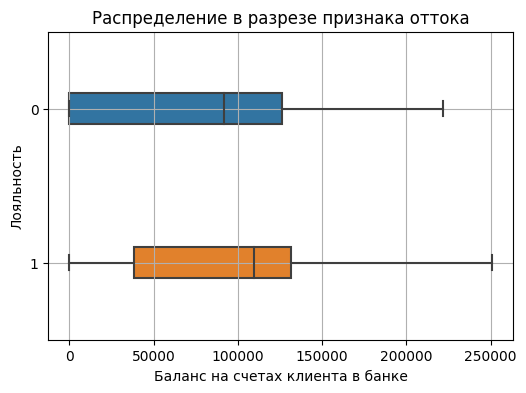

In [114]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент
fig = plt.figure(figsize=(6, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.2
)
boxplot.set_title('Распределение в разрезе признака оттока');
boxplot.set_xlabel('Баланс на счетах клиента в банке');
boxplot.set_ylabel('Лояльность');
boxplot.grid()



In [43]:
fig = make_subplots(rows=1, cols=2)
mask1 = churn_data['Exited']==1
mask0 = churn_data['Exited']==0

fig.add_trace(go.Histogram(x=churn_data[mask1]['Balance'], opacity=0.75, name='Ушедшие клиенты'), 1, 1)
fig.add_trace(go.Histogram(x=churn_data[mask0]['Balance'], opacity=0.45, name='Лояльные клиенты'), 1, 1)
fig.update_layout(barmode='overlay',)


fig.add_trace(go.Box(x=churn_data[mask1]['Balance'], name='Ушедшие клиенты'), 1, 2)
fig.add_trace(go.Box(x=churn_data[mask0]['Balance'], name='Лояльные клиенты'), 1, 2)
fig.update_layout(width = 1000, height  = 500)

fig.show()

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

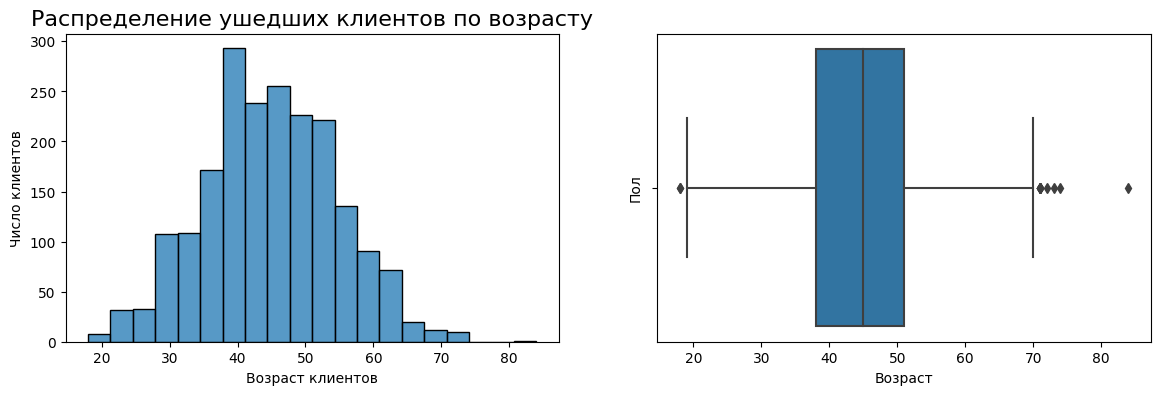

In [95]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент
mask = churn_data['Exited']  == 1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=churn_data[mask], 
    x='Age', 
    bins=20,
    ax=axes[0],
)
histplot1.set_title('Распределение ушедших клиентов по возрасту', fontsize=16)
histplot1.set_xlabel('Возраст клиентов')
histplot1.set_ylabel('Число клиентов')

histplot2 = sns.boxplot(
    data=churn_data[mask],
    x='Age',
    orient='h',
    width=0.9
);
histplot2.set_xlabel('Возраст');
histplot2.set_ylabel('Пол');

In [46]:
fig = make_subplots(rows=1, cols=2)
mask1 = churn_data['Exited']==1
mask0 = churn_data['Exited']==0

fig.add_trace(go.Histogram(x=churn_data[mask1]['Age'], opacity=0.75, name='Ушедшие клиенты'), 1, 1)
fig.add_trace(go.Histogram(x=churn_data[mask0]['Age'], opacity=0.45, name='Лояльные клиенты'), 1, 1)
fig.update_layout(barmode='overlay',)


fig.add_trace(go.Box(x=churn_data[mask1]['Age'], name='Ушедшие клиенты'), 1, 2)
fig.add_trace(go.Box(x=churn_data[mask0]['Age'], name='Лояльные клиенты'), 1, 2)
fig.update_layout(width = 1000, height  = 500)

fig.show()

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

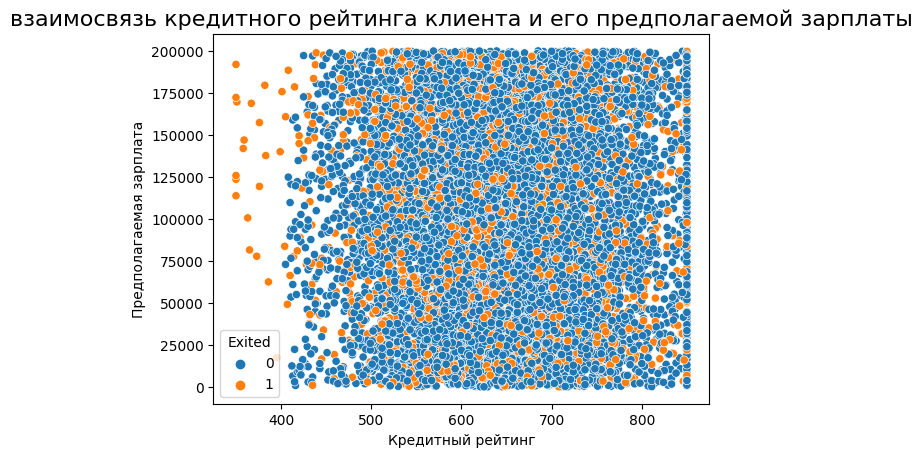

In [58]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент
mask = churn_data['Exited']  == 1
#fig = plt.figure(figsize=(10, 6))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    #s=100,
    #size='CreditScore',
    #sizes=(5, 500)

)
scatterplot.set_title('взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая зарплата');






<AxesSubplot: xlabel='CreditScore', ylabel='EstimatedSalary'>

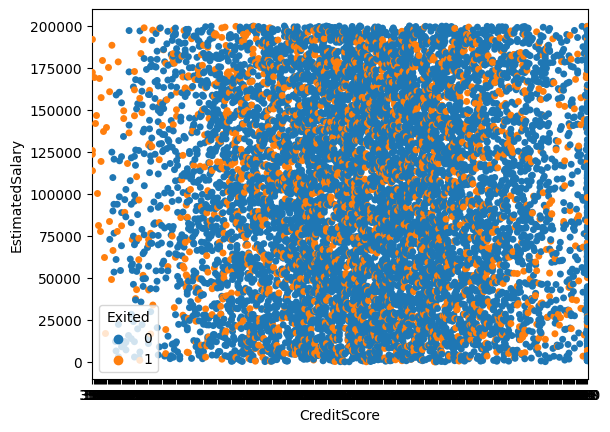

In [48]:
sns.stripplot(x="CreditScore", y='EstimatedSalary', hue="Exited", data=churn_data)

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Female    1139
Male       898
Name: Gender, dtype: int64


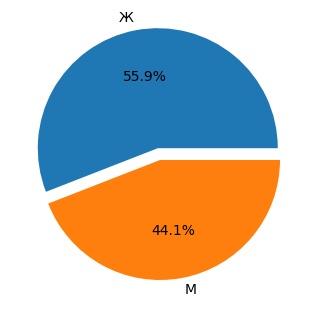

In [117]:
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент
mask = churn_data['Exited']  == 1
churn_data_gender = churn_data[mask]['Gender'].value_counts()
print(churn_data_gender)

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    churn_data[mask]['Gender'].value_counts(),
    autopct='%.1f%%',
    labels= ['Ж', 'М'],
    explode = [0.1, 0]);
#churn_data_gender

#print(churn_data_active_member)


9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [106]:
s1 = churn_data.groupby(by='NumOfProducts')['Exited'].agg(['count', 'sum', 'mean'])

s1['NumOfProducts'] = s1.index
s1['rest'] = s1['count'] - s1['sum']
values = s1['sum']
values2 = s1['rest']
##labels = tuple(range(1,5))
labels = s1['NumOfProducts']

fig = go.Figure()
fig.add_trace(go.Bar(x = labels, y = values, name = 'Ушедшие клиенты'))
fig.add_trace(go.Bar(x = labels, y = values2, name = 'Лояльные клиенты'))
#fig.update_layout(barmode='stack')
fig.update_layout(width = 800, height  = 400)
fig.show()
s1

,count,sum,mean,NumOfProducts,rest
NumOfProducts,,,,,
1,5084,1409,0.277144,1,3675
2,4590,348,0.075817,2,4242
3,266,220,0.827068,3,46
4,60,60,1.000000,4,0


9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [107]:
#IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
mask = churn_data['IsActiveMember']  == 1
#fig = plt.figure(figsize=(10, 6))

mask1 = churn_data['IsActiveMember']  == 1
mask0 = churn_data['IsActiveMember']  == 0
fig = go.Figure()
fig.add_trace(go.Histogram(x=churn_data[mask1]['Exited'], opacity=0.75, name='Активные  клиенты'))
fig.add_trace(go.Histogram(x=churn_data[mask0]['Exited'], opacity=0.45, name='Неактивные клиенты'))
#fig.update_layout(barmode='overlay',)
fig.update_layout(width = 800, height  = 400)
fig.show()

In [109]:

#IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
mask = churn_data['IsActiveMember']  == 1
#fig = plt.figure(figsize=(10, 6))

mask1 = churn_data['Exited']  == 1
mask0 = churn_data['Exited']  == 0
fig = go.Figure()
fig.add_trace(go.Histogram(x=churn_data[mask1]['IsActiveMember'], opacity=0.75, name='Ушедшие  клиенты'))
fig.add_trace(go.Histogram(x=churn_data[mask0]['IsActiveMember'], opacity=0.45, name='Лояльные клиенты'))
#fig.update_layout(barmode='overlay',)
fig.update_layout(width = 600, height  = 400)
fig.show()

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [94]:

churn_data.groupby('Geography').mean()
mask=churn_data['Exited']==1
churn_data_country = churn_data.groupby('Geography')['Exited'].agg(['count', 'sum', 'mean'])
churn_data_country['Geography'] = churn_data_country.index
churn_data_country
#строим график
fig = px.choropleth(
    data_frame=churn_data_country, #DataFrame
    locations="Geography", #столбец со странами
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="mean", #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    range_color=[0.1, 0.35], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()



C:\Users\Людмила\AppData\Local\Temp\ipykernel_9992\4048605011.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

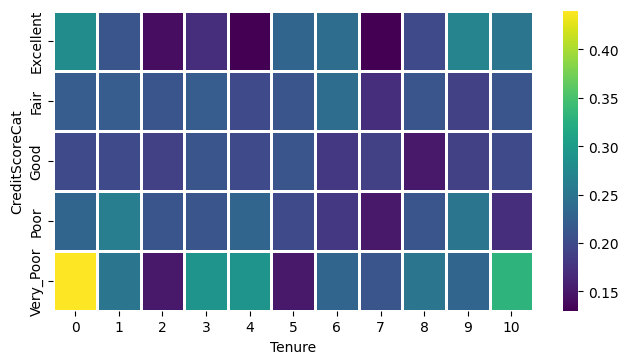

In [42]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

d = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    fill_value=0
).round(2);

fig = plt.figure(figsize=(6, 3))
axes = fig.add_axes([0, 0, 1, 1])
dt_heatmap = sns.heatmap(
    d,
    linewidth=2,
    linecolor='w',
    cmap='viridis',
    ax = axes
)

